<div>
<h1 align='center'>LAB 1 - LINEAR REGRESSION (FROM SCRATCH)</h1>
<p>This lab uses the Medical Insurance Price Prediction from Kaggle (https://www.kaggle.com/datasets/harishkumardatalab/medical-insurance-price-prediction/data) to train Linear Regression models.</p>
<p>The models in this lab are trained from scratch.</p>
</div>

## 1. Import Neccessary Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
import os
import math
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error

## 2. Load Dataset, Data Inspection

### 2.1 - Load Dataset
<p>Create a function to load the dataset using absolute path</p>

In [2]:
def load_dataset():
    current_path = os.getcwd() # Get the current working directory
    data_path = os.path.join(current_path, 'data', 'Medical_insurance.csv') # Join the path to get the datafile
    df = pd.read_csv(data_path) # Use pandas to read the file
    return df

In [3]:
df = load_dataset() # Load the dataset into df variable

### 2.2 - Data Inspection
<p>
    Create a function to inspect the date, including this information:
<ul>
    <li>Data Information</li>
    <li>Data Description</li>
    <li>Data Shape</li>
    <li>Get some first rows of the data</li>
</ul>
</p>

In [4]:
def data_inspection(dataset):
    print('---- DATA INFORMATION ----')
    print(dataset.info())
    print()
    print('---- DATA DESCRIPTION ----')
    print(dataset.describe())
    print()
    print('---- DATA SHAPE ----')
    print(dataset.shape)
    print()
    print('---- SAMPLE DATA ----')
    print(dataset.head())

In [5]:
# Inspect the loaded dataset
data_inspection(df)

---- DATA INFORMATION ----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB
None

---- DATA DESCRIPTION ----
               age          bmi     children       charges
count  2772.000000  2772.000000  2772.000000   2772.000000
mean     39.109668    30.701349     1.101732  13261.369959
std      14.081459     6.129449     1.214806  12151.768945
min      18.000000    15.960000     0.000000   1121.873900
25%      26.000000    26.220000     0.000000   4687.797000
50%      39.000000    30.447500     1.000000   9333.014350
75%   

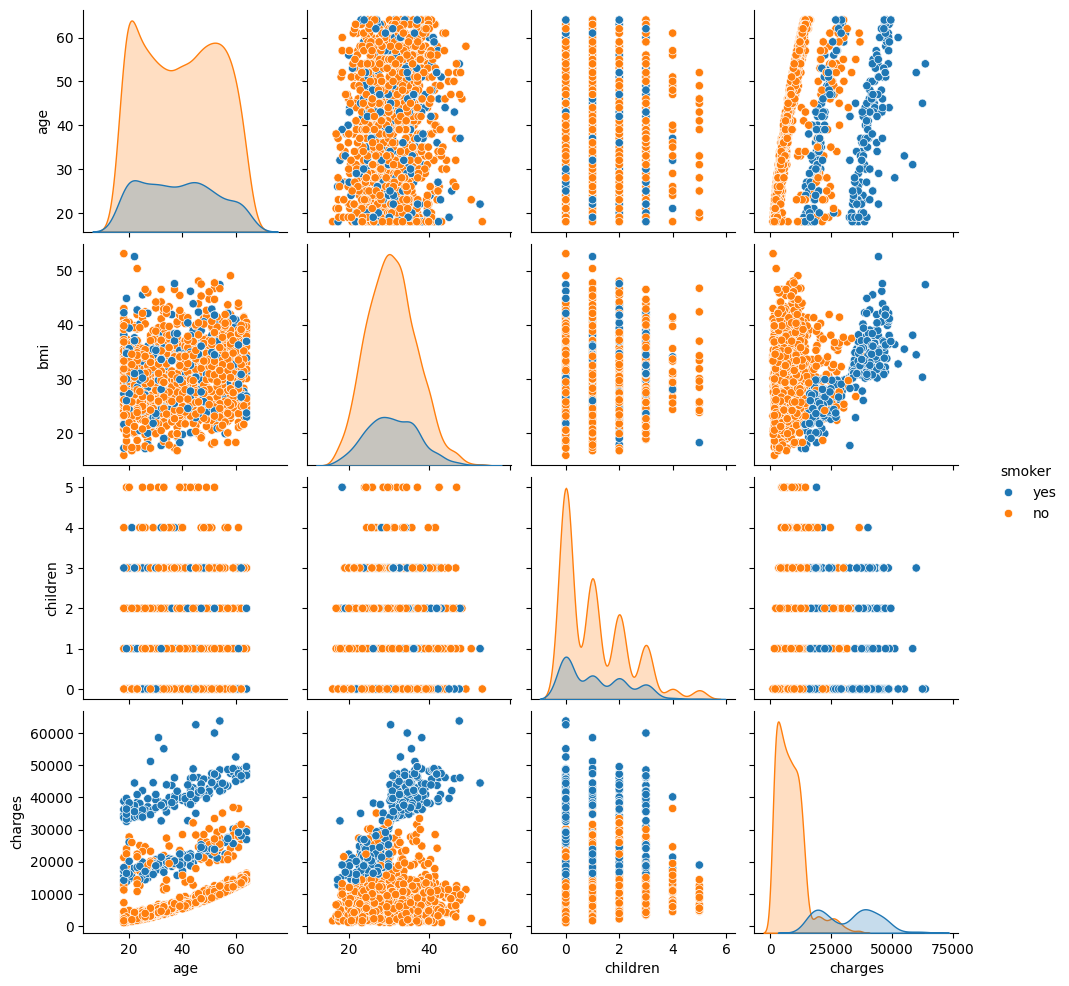

In [6]:
# Using seaborn pairplot to inspect the collinerity between the features
sns.pairplot(df[['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']], hue='smoker')

## 3. Encoding
<p>From the data inspection step above, we can see that there are some features with values of categorical types. However, for linear regression tasks, we want the data type to be numeric. Therefore, first, we will encode some of the features with categorical values.</p>

<p>pd.get_dummies(data, columns, drop_first=True) is a good method to solve the problems.</p>

In [7]:
# use get_dummies to handle categorical data and stored the encoded dataset in df_encoded
df_encoded = pd.get_dummies(df, columns=["sex", "smoker", "region"], drop_first=True)

In [8]:
# inspect the data again
data_inspection(df_encoded)

---- DATA INFORMATION ----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               2772 non-null   int64  
 1   bmi               2772 non-null   float64
 2   children          2772 non-null   int64  
 3   charges           2772 non-null   float64
 4   sex_male          2772 non-null   bool   
 5   smoker_yes        2772 non-null   bool   
 6   region_northwest  2772 non-null   bool   
 7   region_southeast  2772 non-null   bool   
 8   region_southwest  2772 non-null   bool   
dtypes: bool(5), float64(2), int64(2)
memory usage: 100.3 KB
None

---- DATA DESCRIPTION ----
               age          bmi     children       charges
count  2772.000000  2772.000000  2772.000000   2772.000000
mean     39.109668    30.701349     1.101732  13261.369959
std      14.081459     6.129449     1.214806  12151.768945
min      18.000000  

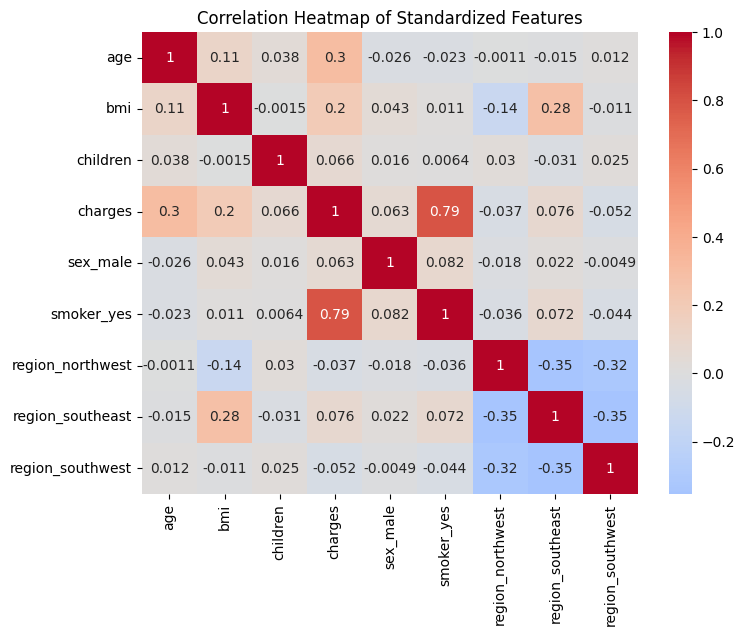

In [9]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(df_encoded.corr(), annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Standardized Features")
plt.show()

<div align="center">

# 🟦 A. Linear Regression with a Single Feature

</div>

---

### 📌 Overview  
This section defines the core functions required to build a **linear regression model (single feature)** from scratch:

1. **`predict_single(X, w, b)`** → Predict the output.  
2. **`compute_cost_single(X, y, w, b)`** → Compute the cost function.  
3. **`compute_gradient_single(X, y, w, b)`** → Compute gradients using partial derivatives.  
4. **`gradient_descent_single(X, y, w_initial, b_initial, cost_function, gradient_function, learning_rate, num_iterations)`** → Train the model via gradient descent.  
---

### ✨ Notations
The notations in this lab are:

1. **`(m,n)`** → (number of training examples, number of training features).
2. **`loss`** → is defined as the difference of a specific predicted value with actual value.
3. **`cost`** → the loss across all training examples.
4. **`w`** → is the weight (slope).
5. **`b`** → is the intercept (bias).
6. **`f_wb`** → is the predicted value with weight **`w`** and bias **`b`**.

## 4. Function to predict

In [10]:
def predict_single(X, w, b):
    '''
    This function will calculate the predicted output
    for input X with weight w and bias b
    '''
    f_wb = X * w + b
    return f_wb

## 5. Function to compute cost

The cost function for linear regression is defined as:

$$
f_{wb}^{(i)} = w \cdot x^{(i)} + b
$$

$$
J(w, b) = \frac{1}{2m} \sum_{i=0}^{m-1} \big( f_{wb}^{(i)} - y^{(i)} \big)^{2}
$$

where:
$ f_{w,b} $ is the predicted value. 
$ y^{(i)} $ is the actual value.


In [11]:
def compute_cost_single(X, y, w, b):
    """
    This function computes the cost over all the training 
    examples or so called the cost_function.
    m - number of training examples
    n - number of features
    """

    # Below is the manual implementation of the cost function,
    """
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        f_wb = w * X[i] + b
        err = (y[i] - f_wb)**2 
        cost = cost + err
    cost = cost/(2*m)
    """

    # However, we can make it faster (best practice) by not using for-loop
    # but using vectorization as below:
    m = X.shape[0]

    # vectorized prediction
    f_wb = X * w + b

    # using np.sum to compute the cost across all training examples
    cost = (1 / (2 * m)) * np.sum((f_wb - y)**2)
    
    return cost

## 6. Function to compute gradient

The gradient function for single linear regression model is defined as:
$$
\frac{\partial J(w,b)}{\partial w} = \frac{1}{m} \sum_{i=0}^{m-1}\big(f_{wb}^{(i)} - y^{(i)}\big)x^{(i)}
$$
$$
\frac{\partial J(w,b)}{\partial b} = \frac{1}{m} \sum_{i=0}^{m-1}\big(f_{wb}^{(i)} - y^{(i)}\big)
$$

In [12]:
def compute_gradient_single(X, y, w, b):
    """
    You need to compute dj_dw, dj_db
    """

    # Below is the manual implementation of the gradient function
    '''
    m = X.shape[0]
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):
        f_wb = w * X[i] + b
        err = f_wb - y[i]
        dj_dw = dj_dw + err * X[i]
        dj_db = dj_db + err
    dj_dw = dj_dw/m
    dj_db = dj_db/m
    '''

    # However, we can make it faster (best practice) by not using for-loop
    # but using vectorization as below:
    m = X.shape[0]

    f_wb = X * w + b
    err = f_wb - y

    # using np.sum and np.dot to calculate the final gradient
    dj_dw = (1/m) * np.dot(err, X)
    dj_db = (1/m) * np.sum(err)

    return dj_dw, dj_db

## 7. Function to perform gradient descent


The gradient descent is computed by updating **`w`**, **`b`** as followed in each iteration:
$$
w = w - \alpha \times \frac{\partial J(w,b)}{\partial w}
$$
$$
b = b - \alpha \times \frac{\partial J(w,b)}{\partial b}
$$

In [13]:
def gradient_descent_single(X, y, w_init, b_init, cost_function, gradient_function, learning_rate, num_iteration):
    '''
    This function will go through all the iterations and
    perform the gradient descent updating.
    J_history - store the cost across all iterations
    '''
    J_history = []
    w = copy.deepcopy(w_init)
    b = b_init

    for i in range(num_iteration):
        dj_dw, dj_db = gradient_function(X, y, w, b)

        w = w - learning_rate * dj_dw
        b = b - learning_rate * dj_db

        if i < 100000:
            J_history.append(cost_function(X, y, w, b))

        if i % math.ceil(num_iteration / 10) == 0:
            print(f'Iteration: {i}, Cost: {J_history[-1]:8.2f}, w: {w}, b: {b}')

    return w, b, J_history

## 8. Function to initialize parameters

Define a function to initialize parameters for single linear regression task

In [14]:
def initialize_parameter_single():
    w = 0
    b = 0
    return w, b

<div align="center">

# A. MULTIPLE FEATURES

</div>

## 10. Function to predict for multiple features

In [15]:
def predict_multiple(X, w, b):
    # Using np.dot to perform matrix multiplication
    f_wb = np.dot(w, X) + b
    return f_wb

## 11. Function to compute cost for multiple features

In [16]:
def compute_cost_multiple(X, y, w, b):
    '''
    Compute the cost across all the training examples
    m : number of training examples
    n : number of features
    '''
    m, n = X.shape
    cost = 0.0

    for i in range(m):
        f_wb = np.dot(X[i], w) + b
        err = f_wb - y[i]
        cost = cost + err**2
    cost = cost / (2*m)
    return cost

 ## 12. Function to compute gradient for multiple variables

In [17]:
def compute_gradient_multiple(X, y, w, b):
    '''
    Compute gradient across all training examples for multiple features
    m : number of training examples
    n : number of features
    X: (m, n)
    y: (m,)
    w: (n,)
    b: scalar
    '''

    # Below is the manual implementation of the cost function,
    '''
    m, n = X.shape
    dj_dw = np.zeros((n, ))
    dj_db = 0

    for i in range(m):
        err = (np.dot(X[i], w) + b) - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err * X[i,j]
        dj_db = dj_db + err
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    '''
    
    # However, we can make it faster (best practice) by not using for-loop
    # but using vectorization as below:
    m = X.shape[0]

    f_wb = np.dot(X, w) + b
    err = f_wb - y

    # using np.sum and np.dot to calculate the final gradient
    dj_dw = (1/m) * np.dot(X.T, err)
    dj_db = (1/m) * np.sum(err)

    return dj_dw, dj_db

## 13. Function to initialize parameters for multiple features

In [18]:
def initialize_parameter_multiple(m, n):
    w = np.zeros((n, ))
    b = 0
    return w, b

## 14. Function to do gradient descent for multiple features

In [19]:
def gradient_descent_multiple(X, y, w_init, b_init, cost_function, gradient_function, learning_rate, num_iterations):
    m, n = X.shape
    J_history = []
    w = copy.deepcopy(w_init)
    b = b_init
    
    for i in range(num_iterations):
        # compute gradient descent 
        dj_dw, dj_db = gradient_function(X, y, w, b)
    
        w = w - learning_rate * dj_dw
        b = b - learning_rate * dj_db

         # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(X, y, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iterations / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")

    return w, b, J_history

## 15. Train, Test, Split

In [20]:
X = df_encoded.drop(columns=['charges'])
y = df_encoded['charges']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.2,
    random_state = 42
)

## 16. Normalization

Perform normalization using StandardScaler()

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)
X_train_norm = pd.DataFrame(X_train_norm, columns=X_train.columns, index=X_train.index)
X_test_norm = pd.DataFrame(X_test_norm, columns=X_test.columns, index=X_test.index)

## 16. Test Single Feature

SINGLE LINEAR REGRESSION WITH FEATURE: bmi
Iteration: 0, Cost: 161515596.51, w: 11.631315402410042, b: 66.85537024095174
Iteration: 100, Cost: 103794888.30, w: 924.1275858344367, b: 5311.771692480846
Iteration: 200, Cost: 82613822.94, w: 1476.8908498702085, b: 8488.98694236145
Iteration: 300, Cost: 74841265.34, w: 1811.738493601197, b: 10413.650011106618
Iteration: 400, Cost: 71989064.53, w: 2014.5792969020097, b: 11579.553998357964
Iteration: 500, Cost: 70942427.13, w: 2137.4542588556724, b: 12285.8241656215
Iteration: 600, Cost: 70558355.35, w: 2211.888278192126, b: 12713.66175312511
Iteration: 700, Cost: 70417417.21, w: 2256.978206575328, b: 12972.833115254307
Iteration: 800, Cost: 70365698.86, w: 2284.2923521733537, b: 13129.831464417204
Iteration: 900, Cost: 70346720.40, w: 2300.8384540746433, b: 13224.93642291794


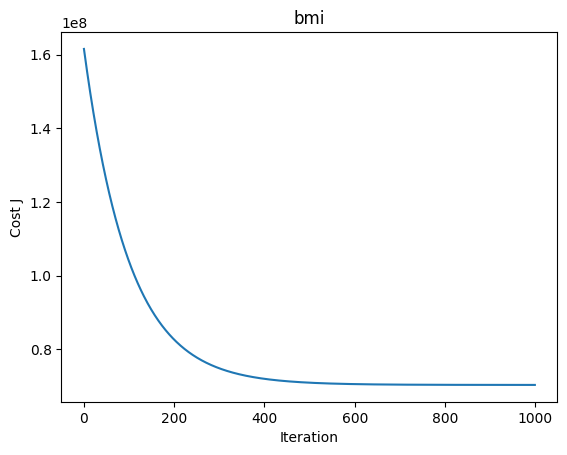

SINGLE LINEAR REGRESSION WITH FEATURE: children
Iteration: 0, Cost: 161539767.22, w: 3.7591309331864897, b: 66.85537024095174
Iteration: 100, Cost: 105337700.57, w: 298.6692797790843, b: 5311.771692480846
Iteration: 200, Cost: 84713912.61, w: 477.31712937100946, b: 8488.986942361447
Iteration: 300, Cost: 77145852.31, w: 585.5367151964397, b: 10413.650011106616
Iteration: 400, Cost: 74368693.38, w: 651.0929409387561, b: 11579.553998357964
Iteration: 500, Cost: 73349593.19, w: 690.804964421364, b: 12285.8241656215
Iteration: 600, Cost: 72975626.41, w: 714.8613342203538, b: 12713.66175312511
Iteration: 700, Cost: 72838396.37, w: 729.4339718538702, b: 12972.833115254307
Iteration: 800, Cost: 72788038.74, w: 738.2616449139463, b: 13129.831464417204
Iteration: 900, Cost: 72769559.61, w: 743.609188276746, b: 13224.93642291794


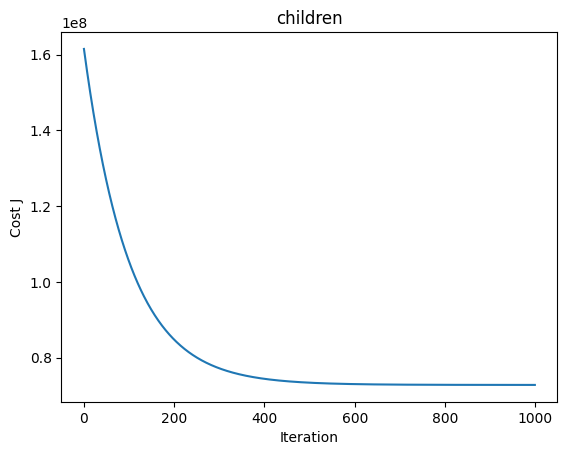

SINGLE LINEAR REGRESSION WITH FEATURE: sex_male
Iteration: 0, Cost: 161539173.64, w: 4.135992456770613, b: 66.85537024095174
Iteration: 100, Cost: 105299812.07, w: 328.6115621379242, b: 5311.771692480846
Iteration: 200, Cost: 84662338.46, w: 525.1692696142544, b: 8488.98694236145
Iteration: 300, Cost: 77089256.10, w: 644.238117867808, b: 10413.650011106618
Iteration: 400, Cost: 74310254.29, w: 716.366506046811, b: 11579.553998357964
Iteration: 500, Cost: 73290477.84, w: 760.0597512373789, b: 12285.8241656215
Iteration: 600, Cost: 72916262.90, w: 786.5278274481653, b: 12713.66175312511
Iteration: 700, Cost: 72778941.79, w: 802.5614055274436, b: 12972.833115254307
Iteration: 800, Cost: 72728550.74, w: 812.2740731190364, b: 13129.831464417204
Iteration: 900, Cost: 72710059.35, w: 818.1577200054846, b: 13224.93642291794


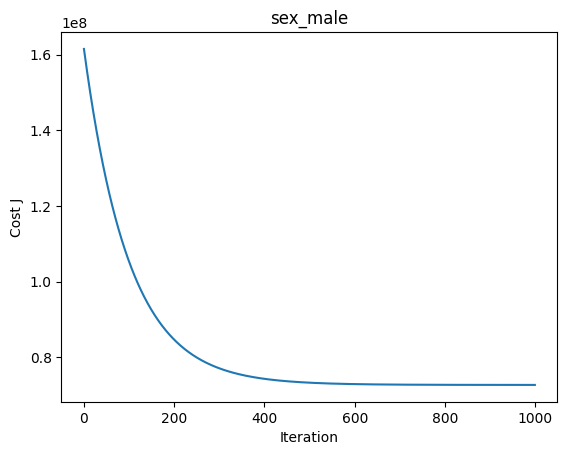

SINGLE LINEAR REGRESSION WITH FEATURE: region_northwest
Iteration: 0, Cost: 161541667.28, w: -2.146378623374793, b: 66.85537024095174
Iteration: 100, Cost: 105458981.26, w: -170.53339427929134, b: 5311.771692480846
Iteration: 200, Cost: 84879000.96, w: -272.53727025254705, b: 8488.986942361447
Iteration: 300, Cost: 77327016.21, w: -334.3282027246119, b: 10413.650011106616
Iteration: 400, Cost: 74555756.34, w: -371.759322859384, b: 11579.553998357964
Iteration: 500, Cost: 73538820.86, w: -394.43398884176133, b: 12285.8241656215
Iteration: 600, Cost: 73165648.43, w: -408.1696311511879, b: 12713.66175312511
Iteration: 700, Cost: 73028709.88, w: -416.49027718844985, b: 12972.833115254307
Iteration: 800, Cost: 72978459.21, w: -421.53067857032676, b: 13129.831464417204
Iteration: 900, Cost: 72960019.34, w: -424.5840047155146, b: 13224.93642291794


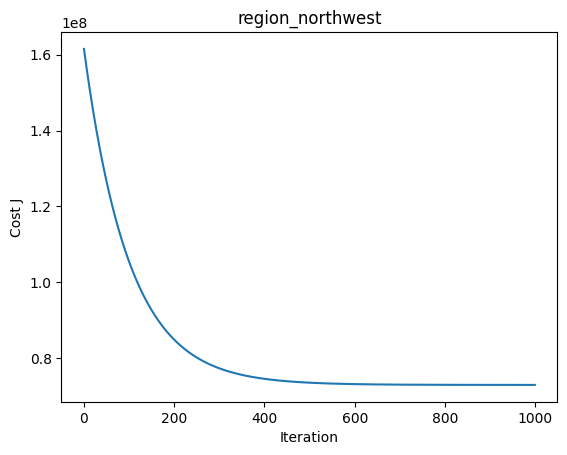

SINGLE LINEAR REGRESSION WITH FEATURE: region_southeast
Iteration: 0, Cost: 161538053.04, w: 4.766913174855411, b: 66.85537024095174
Iteration: 100, Cost: 105228284.56, w: 378.7392751166147, b: 5311.771692480846
Iteration: 200, Cost: 84564974.57, w: 605.2806760455431, b: 8488.986942361447
Iteration: 300, Cost: 76982411.35, w: 742.5127593694809, b: 10413.650011106616
Iteration: 400, Cost: 74199930.47, w: 825.6438983851543, b: 11579.553998357964
Iteration: 500, Cost: 73178877.34, w: 876.0022847526508, b: 12285.8241656215
Iteration: 600, Cost: 72804193.91, w: 906.507906443457, b: 12713.66175312511
Iteration: 700, Cost: 72666700.90, w: 924.9873102105182, b: 12972.833115254307
Iteration: 800, Cost: 72616246.76, w: 936.181586696579, b: 13129.831464417204
Iteration: 900, Cost: 72597732.22, w: 942.9627484497382, b: 13224.93642291794


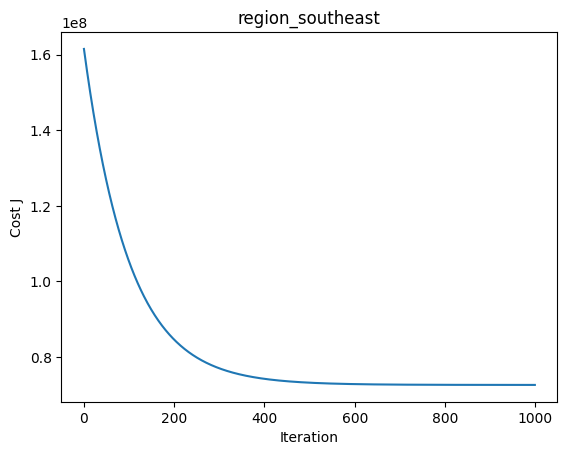

SINGLE LINEAR REGRESSION WITH FEATURE: region_southwest
Iteration: 0, Cost: 161540379.61, w: -3.325875798416517, b: 66.85537024095174
Iteration: 100, Cost: 105376789.21, w: -264.2464300932798, b: 5311.771692480846
Iteration: 200, Cost: 84767120.42, w: -422.30438815788216, b: 8488.986942361447
Iteration: 300, Cost: 77204241.25, w: -518.0512264055089, b: 10413.650011106616
Iteration: 400, Cost: 74428983.59, w: -576.051830403381, b: 11579.553998357964
Iteration: 500, Cost: 73410581.08, w: -611.1868816038984, b: 12285.8241656215
Iteration: 600, Cost: 73036870.31, w: -632.4706569057594, b: 12713.66175312511
Iteration: 700, Cost: 72899734.22, w: -645.3637387605384, b: 12972.833115254307
Iteration: 800, Cost: 72849411.06, w: -653.1739865834186, b: 13129.831464417204
Iteration: 900, Cost: 72830944.59, w: -657.9052038161856, b: 13224.93642291794


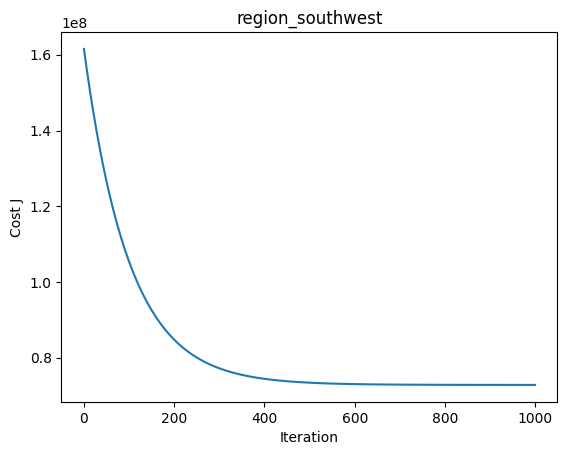

SINGLE LINEAR REGRESSION WITH FEATURE: age
Iteration: 0, Cost: 161484097.56, w: 17.12241239148925, b: 66.85537024095174
Iteration: 100, Cost: 101784315.15, w: 1360.4044838926773, b: 5311.771692480846
Iteration: 200, Cost: 79877013.03, w: 2174.1250506761207, b: 8488.986942361447
Iteration: 300, Cost: 71837957.17, w: 2667.0529135980087, b: 10413.650011106616
Iteration: 400, Cost: 68887962.74, w: 2965.6540402786427, b: 11579.553998357964
Iteration: 500, Cost: 67805439.21, w: 3146.5377751245956, b: 12285.8241656215
Iteration: 600, Cost: 67408198.74, w: 3256.111794136301, b: 12713.66175312511
Iteration: 700, Cost: 67262428.24, w: 3322.488495461064, b: 12972.833115254307
Iteration: 800, Cost: 67208936.61, w: 3362.697538795381, b: 13129.831464417204
Iteration: 900, Cost: 67189307.44, w: 3387.0549885268842, b: 13224.93642291794


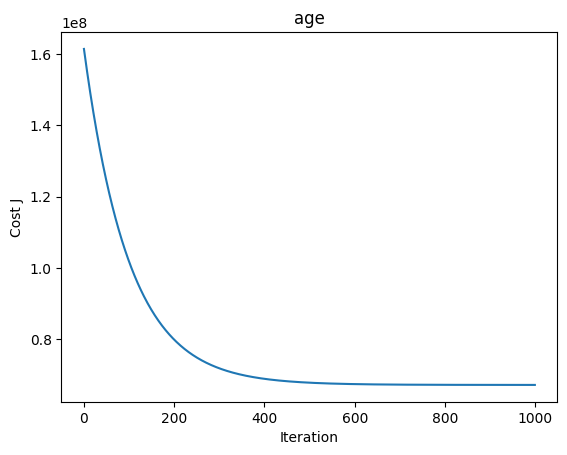

SINGLE LINEAR REGRESSION WITH FEATURE: smoker_yes
Iteration: 0, Cost: 161085044.58, w: 47.889900114596834, b: 66.85537024095174
Iteration: 100, Cost: 76312830.61, w: 3804.9331694319417, b: 5311.771692480846
Iteration: 200, Cost: 45205003.63, w: 6080.838910600863, b: 8488.986942361447
Iteration: 300, Cost: 33789743.20, w: 7459.515324840512, b: 10413.650011106616
Iteration: 400, Cost: 29600824.10, w: 8294.67673807394, b: 11579.553998357964
Iteration: 500, Cost: 28063667.47, w: 8800.592831908569, b: 12285.8241656215
Iteration: 600, Cost: 27499595.82, w: 9107.061844898459, b: 12713.66175312511
Iteration: 700, Cost: 27292605.32, w: 9292.711712668217, b: 12972.833115254307
Iteration: 800, Cost: 27216648.53, w: 9405.172914101553, b: 13129.831464417204
Iteration: 900, Cost: 27188775.60, w: 9473.298585182107, b: 13224.93642291794


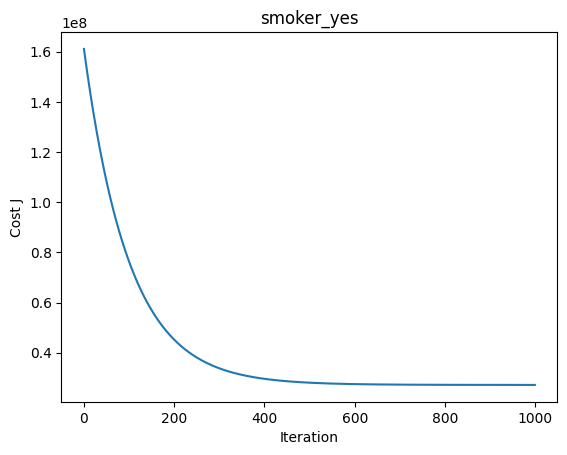

In [23]:
training_features = ['bmi', 'children', 'sex_male', 'region_northwest', 'region_southeast', 'region_southwest', 'age', 'smoker_yes']

RMSE_history = []

for training_feature in training_features:
    # Training data
    X = X_train_norm[[training_feature]].to_numpy().flatten()
    y = y_train.to_numpy()
    
    # Initialize parameters
    w_init, b_init = initialize_parameter_single()
    
    print('SINGLE LINEAR REGRESSION WITH FEATURE:', training_feature)
    
    # Train
    w_final_single, b_final_single, J_history_single = gradient_descent_single(
        X, y, w_init, b_init,
        compute_cost_single,
        compute_gradient_single,
        learning_rate=0.005,
        num_iteration=1000
    )

    # Plot cost history
    plt.plot(J_history_single)
    plt.xlabel("Iteration")
    plt.ylabel("Cost J")
    plt.title(training_feature)
    plt.show()
    
    # Predict on TEST set
    X_test_feature = X_test_norm[[training_feature]].to_numpy().flatten()
    y_test_true = y_test.to_numpy()
    y_test_pred = w_final_single * X_test_feature + b_final_single
    
    # Compute RMSE
    rmse = root_mean_squared_error(y_test_true, y_test_pred)
    RMSE_history.append((training_feature, rmse))

In [24]:
print(w_final_single, b_final_single)

9514.248444798177 13282.103341608454


In [25]:
for feature, rmse in RMSE_history:
    print(f"Feature: {feature:20s} | RMSE: {rmse:.4f}")

Feature: bmi                  | RMSE: 12079.6810
Feature: children             | RMSE: 12357.6469
Feature: sex_male             | RMSE: 12390.7126
Feature: region_northwest     | RMSE: 12386.6327
Feature: region_southeast     | RMSE: 12373.7993
Feature: region_southwest     | RMSE: 12389.2989
Feature: age                  | RMSE: 11617.6631
Feature: smoker_yes           | RMSE: 7850.2305


## 17. Test Multiple Feature

Iteration    0: Cost 160985743.25   
Iteration  100: Cost 70505364.00   
Iteration  200: Cost 37473777.81   
Iteration  300: Cost 25281125.23   
Iteration  400: Cost 20743222.30   
Iteration  500: Cost 19042415.34   
Iteration  600: Cost 18400424.30   
Iteration  700: Cost 18155989.80   
Iteration  800: Cost 18061762.46   
Iteration  900: Cost 18024723.01   


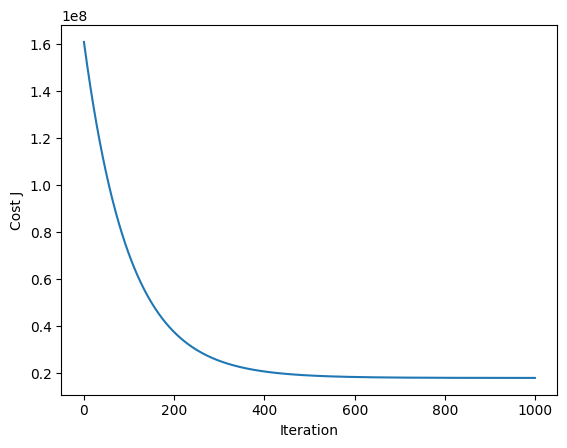

In [26]:
m, n = X_train_norm.shape

# initialize parameters
w_init, b_init = initialize_parameter_multiple(m, n)

w_final_multiple, b_final_multiple, J_history_multiple = gradient_descent_multiple(
    X_train_norm.values, 
    y_train.values, 
    w_init, b_init, 
    compute_cost_multiple, 
    compute_gradient_multiple, 
    learning_rate=0.005, 
    num_iterations=1000
)

plt.plot(J_history_multiple)
plt.xlabel("Iteration")
plt.ylabel("Cost J")
plt.show()

In [27]:
print(w_final_multiple, b_final_multiple)

[ 3.52192424e+03  1.94777703e+03  5.51149391e+02 -3.75606988e+00
  9.63125579e+03 -8.80647126e+01 -3.82034561e+02 -3.65238710e+02] 13282.103341608454


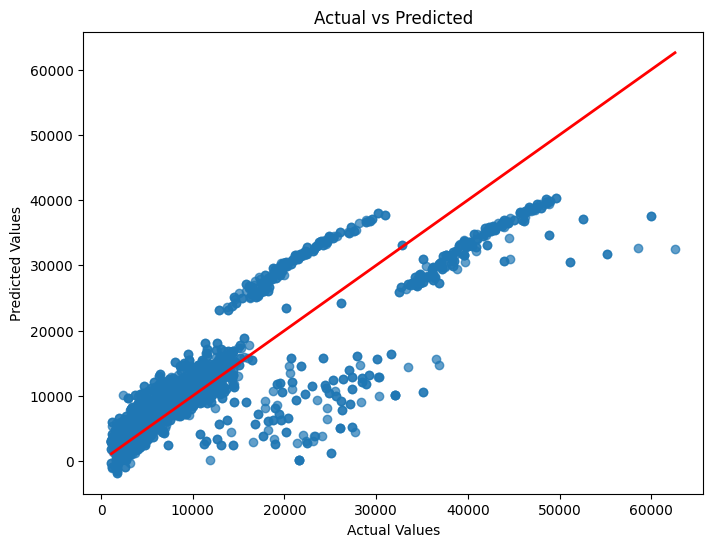

In [28]:
predictions_multi = np.dot(X_train_norm.values, w_final_multiple) + b_final_multiple


# Plot actual vs predicted
plt.figure(figsize=(8,6))
plt.scatter(y_train, predictions_multi, alpha=0.7)   # scatter plot
plt.plot([y_train.min(), y_train.max()], 
         [y_train.min(), y_train.max()], 
         color="red", linewidth=2)             # 45-degree reference line

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.show()

In [29]:
rmse_multiple = root_mean_squared_error(predictions_multi, y_train)
print(f"Mutiple Features | RMSE: {rmse_multiple:.4f}")

Mutiple Features | RMSE: 6001.6312
